# Image processing experiments

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import glob

%matplotlib inline
pd.set_option('display.max_column', 100) #set max number of cols to display before ...

In [4]:
import skimage.io #to read and write images
import skimage.viewer #to view images; in new window; import matplotlib first
import skimage.transform

# Scikit-learn skimage

Data carpentry tutorial 
https://datacarpentry.org/image-processing/aio/index.html

In [5]:
#get path for TQ1980 AP RGBI
rgbiTQ1980 = '../data/APGB_Ealing_InfraRedImagery/111803_20200707/50cm Colour Infrared/111803-1_CIR_1_Shape/TQ1980.tif'


In [6]:
image = skimage.io.imread(fname=rgbiTQ1980)

In [7]:
#image is numpy array so has all numpy array attributes/methods
image.shape

(2000, 2000, 3)

In [8]:
# display image - opens in a new window; very annoying
#create a viewable object
viewer = skimage.viewer.ImageViewer(image)
#view it -annoying pops up in another window
#viewer.show()

[]

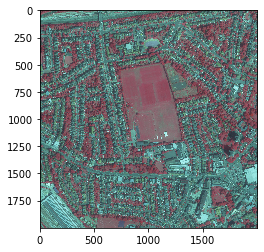

In [9]:
#view with mpl
plt.imshow(image)
#note y-axis increasing downwards from top left

In [10]:
image[750,1000,:]

array([145,  78,  96], dtype=uint8)

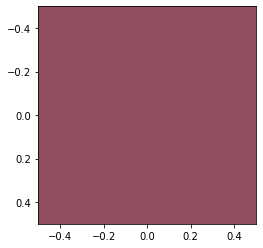

In [11]:
#plot one pixel
pixel = image[750:751,1000:1001,:]
plt.imshow(pixel)

In [12]:
#resize image
#collect triple of dimensions with integer division '//' eg 3 // 2 = 1
new_shape = (image.shape[0] // 2, image.shape[1] // 2, image.shape[2])
small = skimage.transform.resize(image=image, output_shape=new_shape)

In [13]:
#observe the number of pixels is less
#presume it keeps every other pixel? or merges them or something?
small.shape

(1000, 1000, 3)

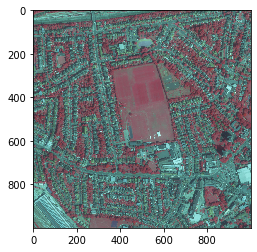

In [14]:
plt.imshow(small)
#note only 1000 x 1000 pixels

## Read in a garden
Remember that the RGBI images are 50 cm resolution, each pixel represents 50cm.
- Red colours are vegetation
- Bue/Green are non-vegetation; ie manmade

In [15]:

rgbi_garden_paths = glob.glob(
    '../rgbi_gardens/*.tif', recursive=True)

In [16]:
rgbi_garden_paths[24]

'../rgbi_gardens/TQ1980_1000001778713877.tif'

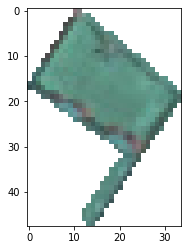

In [29]:
gdn1 = skimage.io.imread(fname = rgbi_garden_paths[1])
plt.imshow(gdn1)

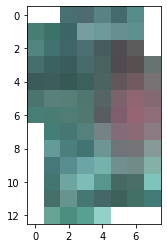

In [34]:
gdn2 = skimage.io.imread(fname = rgbi_garden_paths[6])
plt.imshow(gdn2)

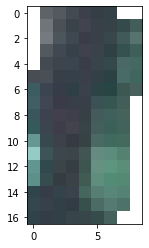

In [35]:
gdn3 = skimage.io.imread(fname = rgbi_garden_paths[24])
plt.imshow(gdn3)

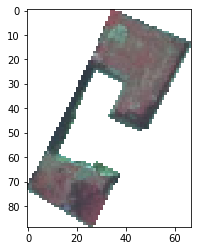

In [46]:
gdn4 = skimage.io.imread(fname = rgbi_garden_paths[16])
plt.imshow(gdn4)

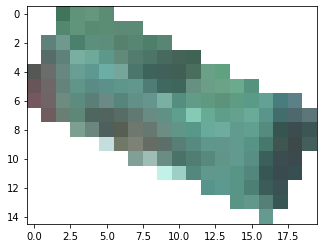

In [78]:
gdn5 = skimage.io.imread(fname = rgbi_garden_paths[48])
plt.imshow(gdn5)

## Histograms in image processing

- https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935
- h(i) = the number of pixels in I(image) with the intensity value i. Plot RGB channels separately.

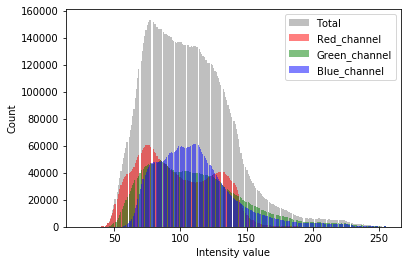

In [21]:
_ = plt.hist(image.ravel(), bins = 256, color = 'gray', alpha = 0.5)
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
_ = plt.xlabel('Intensity value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_channel', 'Green_channel', 'Blue_channel'])
plt.show()

### Function to plot histogram of RGB intensities

In [22]:
def rgb_hist(image): #expects image in numpy array
    _ = plt.hist(image.ravel(), bins = 256, color = 'gray', alpha = 0.5)
    _ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5)
    _ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
    _ = plt.xlabel('Intensity value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_channel', 'Green_channel', 'Blue_channel'])
    plt.show()

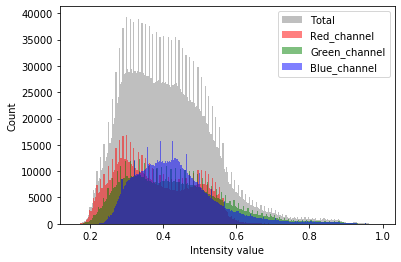

In [23]:
rgb_hist(image=small)
#this is the image resized to half size of 'image' 
#can see how it has evenly removed some pixels

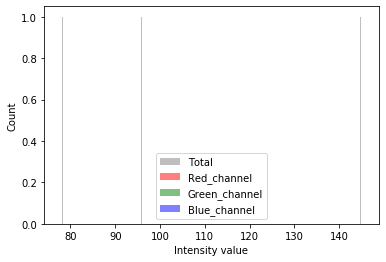

In [24]:
rgb_hist(pixel)

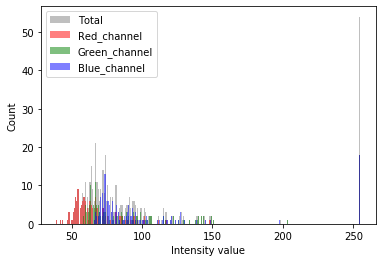

In [25]:
rgb_hist(gdn1)
#a large number of 255 values corresponding to the area of white

## Thresholding 

A simple example of thresholding is to only keep 'high-intensity' pixels. Intensity increases towards 255, so values closer to 255 are more intense than those closer to zero. [255,255,255] represents white, full intensity on each channel. [0,0,0] is black, zero intensity on each channel. The near infra red images map vegetation to red, so vegetation pixels will have high intensity in the red channel; these are what I will need to cut out. Set a threshold or mahcine learn the threshold?

In [46]:
#set any value less than 128 to 0
image2 = image.copy()
image2[image2 < 128] = 0 #set pixel values less than 128 to 0

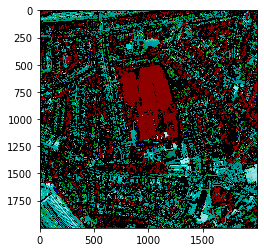

In [47]:
plt.imshow(image2)


### Set threshold on the red channel only

In [137]:
image3 = image.copy()
image3[0].shape

(2000, 3)

In [138]:
#The red channel
image3[:,:,0].shape

(2000, 2000)

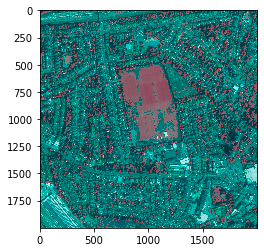

In [139]:
image3[:,:,0][image3[:,:,0] < 128] = 0
plt.imshow(image3)


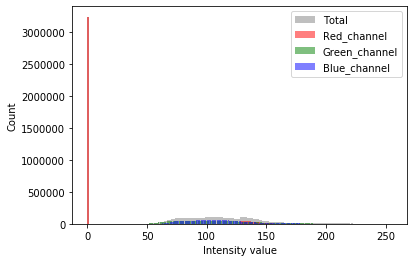

In [142]:
rgb_hist(image3)

In [140]:
image3.shape

(2000, 2000, 3)

In [141]:
image3

array([[[  0,  59,  71],
        [  0,  59,  71],
        [  0,  63,  75],
        ...,
        [148,  80,  91],
        [142,  76,  86],
        [147,  81,  91]],

       [[  0,  58,  70],
        [  0,  58,  70],
        [  0,  59,  71],
        ...,
        [148,  78,  89],
        [138,  70,  81],
        [151,  83,  94]],

       [[  0,  54,  65],
        [  0,  57,  69],
        [  0,  57,  69],
        ...,
        [160,  88, 100],
        [146,  74,  86],
        [148,  78,  89]],

       ...,

       [[139,  98, 104],
        [136,  86,  95],
        [133,  80,  90],
        ...,
        [  0,  72,  79],
        [  0,  83,  90],
        [  0,  77,  84]],

       [[132,  93,  96],
        [131,  80,  87],
        [143,  81,  94],
        ...,
        [  0,  72,  80],
        [  0,  79,  87],
        [  0,  80,  87]],

       [[142, 106, 108],
        [136,  83,  91],
        [149,  83,  97],
        ...,
        [  0,  85,  93],
        [  0,  85,  93],
        [  0,  86,  94]]

https://github.com/datasciencecampus/green-spaces/blob/develop/green_spaces/vegetation_analysis.py#L476

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html

# ARCHIVE

## Slicing 3d numpy arrays

In [66]:
a_3d_array = np.array([[[1,2,3,4], [5,6,7,8], [9,10,11,12]]
                       , [[13,14,15,16], [17,18,19,20], [21,22,23,24]]])

In [69]:
a_3d_array.shape

(2, 3, 4)

In [67]:
a_3d_array

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [70]:
a_3d_array[0]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [71]:
a_3d_array[1]

array([[13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])

In [77]:
a_3d_array[0,2,3]

12

In [79]:
a_3d_array[0:2,2,3]

array([12, 24])

In [80]:
a_3d_array[0:2,1:3,2:4]

array([[[ 7,  8],
        [11, 12]],

       [[19, 20],
        [23, 24]]])

In [81]:
a_3d_array[0,1,2]

7

In [82]:
a_3d_array[1,2,3]

24

In [108]:
#replace values in the whole array subject to a condition
arr2 = a_3d_array.copy()
arr2.shape
arr2[arr2 < 12] = 0
arr2

In [132]:
#replace values in part of the array subject to a condition
arr3 = a_3d_array.copy()
arr3.shape

(2, 3, 4)

In [133]:
arr3

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [134]:
arr3[:,:,0]

array([[ 1,  5,  9],
       [13, 17, 21]])

In [135]:
#specify the part of array with first arr3[0,:,0:2]
#then create a boolean mask on the same subset [arr3[0,:,0:2] < 6]
# = 0, set true values to zero
arr3[0,:,0:2][arr3[0,:,0:2] < 6] = 0

In [136]:
arr3

array([[[ 0,  0,  3,  4],
        [ 0,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [124]:
#image example, n x n x 3
imeg = np.array([[[1,2,3], [5,6,7]]
                       , [[13,14,15], [17,18,19]]])

In [125]:
imeg.shape

(2, 2, 3)

In [126]:
imeg

array([[[ 1,  2,  3],
        [ 5,  6,  7]],

       [[13, 14, 15],
        [17, 18, 19]]])

In [128]:
imeg[:,:,0] < 6

array([[ True,  True],
       [False, False]])

In [129]:
#subset just the Red channel
imeg[:,:,0][imeg[:,:,0] < 6] = 0

In [130]:
imeg

array([[[ 0,  2,  3],
        [ 0,  6,  7]],

       [[13, 14, 15],
        [17, 18, 19]]])